In [93]:
# All the required packages
import numpy as np
import math
import cmath
from numpy import *
from numpy.linalg import eig
from math import *
import matplotlib.pyplot as plt

In [94]:
# Hamiltonian parameters
# length units - Angstrom
a1 = array([2.55*sqrt(3)/2,2.55/2])
a2 = array([2.55*sqrt(3)/2,-2.55/2])
#Energy units-eV
tc = 1.994
t1 = 2.86
t2 = -0.236
t3 = 0.252
U=9.3

In [95]:
# Hamiltonian 
def H1(K):
    return t1*(1+cmath.exp(dot(K,a1)*1j)+cmath.exp(dot(K,a2)*1j))
def H2(K):
    return t2*(cmath.exp(dot(K,a1)*1j)+cmath.exp(dot(K,a2)*1j) + cmath.exp(dot(K,-a2)*1j)+cmath.exp(dot(K,-a1)*1j) +cmath.exp(dot(K,a2-a1)*1j) +cmath.exp(dot(K,a1-a2)*1j))
def H3(K):
    return t3*(cmath.exp(dot(K,a2-a1)*1j) +cmath.exp(dot(K,a1-a2)*1j) + cmath.exp(dot(K,a1+a2)*1j))
def H(K):
    return np.array([[tc + H2(K),0,0,H1(K)+H3(K)],[0,tc+H2(K)+U,H1(K)+H3(K),0],[0,conj(H1(K))+conj(H3(K)),tc+H2(K)+U,0],[conj(H1(K))+conj(H3(K)),0,0,tc+H2(K)]],dtype=complex)

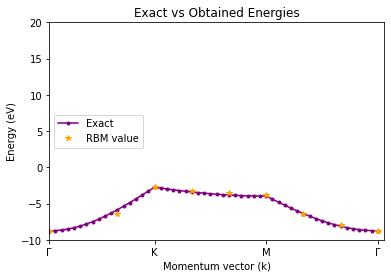

In [96]:
KK=np.array([2*pi/(3*2.55),2*pi/(3*2.55)*1/sqrt(3)])
M=np.array([2*pi/(3*2.55),0])
Gamma=np.array([0,0])
steps = 54  #best if multiple of 9
En = np.zeros((steps,))
Kva = np.zeros((steps,2))
for i in range(steps):
  if i >-1 and i <steps/3:
    K=(Gamma-(Gamma-KK)*(i/(steps/3-1))).real
  elif i >steps/3-1 and i <steps/3*2:
    K=(KK-(KK-M)*((i-steps/3+1)/(steps/3))).real
  elif i >steps/3*2-1 and i <steps:
    K=(M-(M-Gamma)*((i-steps/3*2+1)/(steps/3))).real
  En[i] = min(eig(H(K))[0].real)
  Kva[i] = K

ourEn = np.array([-8.757759656429116, -6.482740881897452,-2.7029941673136624,-3.2128966307229865,-3.5915573876725673,-3.8619666282314147, -6.382188912454146 ,-7.9617498550679295,-8.757759656429116 ])
x1= np.arange(steps)
x2= np.arange(9)
x2=(steps/9)*x2+(steps/9)-1
x2[0]=0
plt.plot( x1,En, color='purple',marker='.')
plt.plot( x2,ourEn, color='orange',marker='*', linestyle='none')
plt.legend(("Exact","RBM value"),loc='center left')

plt.title("Exact vs Obtained Energies")
plt.xlabel("Momentum vector (k)")
plt.ylabel("Energy (eV)")
plt.ylim([-10, 20])
plt.xlim([0, steps])
frame1 = plt.gca()
#frame1.axes.get_xaxis().set_visible(False)
#frame1.xaxis.set_major_formatter(plt.NullFormatter())
plt.xticks([0,steps/3-1,steps/3*2-1,steps-1],["Γ",'K',"M","Γ"]) 
plt.show()


#Exact Energies
[-8.758      -6.94594818 -2.74380769 -3.40130933 -3.82056351 -3.96448831
 -6.39230448  -8.12776724  -8.758     ]

#Starting points for K =  [0.27377714 , 0. ]

params24 [ 2.46711098  0.0854794   0.52680335 -2.64930553  0.         -0.43386756
  0.3525486  -1.32115706  0.75911198  2.04353114  1.41573227 -2.28243605
 -1.6156323  -0.92412621] -7.822181435524062 [0.27377714, 0.0]

params23 [ 2.46711098+0.j  0.0854794 +0.j  0.52680335+0.j -2.64930553+0.j
  0.        +0.j -0.43386756+0.j  0.3525486 +0.j -1.32115706+0.j
  0.75911198+0.j  2.04353114+0.j  1.41573227+0.j -2.28243605+0.j
 -1.6156323 +0.j -0.92412621+0.j] -7.9617498550679295 [0.27377714, 0.0]

#Starting points for K =  [0.54755428 , 0. ]

params21 [ 0.01712139 -0.76004605  0.35107582  0.04012429 -2.          2.30031627
 -0.05437981  1.02752418 -0.19332928  2.78049512  2.87904461 -2.3935827
 -2.72228734  1.80330421] -6.1080865785296625 [0.54755428, 0.0]

params22 [-0.02190804+0.j -0.79891586+0.j  0.39098593+0.j  0.08007223+0.j
 -1.95989334+0.j  2.34042277+0.j -0.01427597+0.j  1.06756627+0.j
 -0.1532872 +0.j  2.82053481+0.j  2.91842764+0.j -2.43349487+0.j
 -2.68292807+0.j  1.76339587+0.j] -6.382188912454146 [0.54755428, 0.0] adam using 21

#Starting points for K = [0.82133141, 0]

params19  [-0.13444151 -0.67737765  1.85974303 -0.02594086  1.          0.44806345
 -1.42267605 -2.27933634 -1.90712893 -0.14550756  0.48747647  2.60715533
 -2.95221424 -1.96426776] -3.502869819890313 [0.82133141, 0]

params20 [-0.11472696+0.j -0.69425374+0.j  1.88968497+0.j -0.05398883+0.j
  0.97103664+0.j  0.41866336+0.j -1.45206155+0.j -2.30913659+0.j
 -1.93693601+0.j -0.17531129+0.j  0.45753486+0.j  2.63706515+0.j
 -2.98215173+0.j -1.93435043+0.j] -3.8619666282314147 [0.82133141, 0] adam using 18



params21 [-1.31174074  0.42250078  1.76448599 -2.0248189  -1.          1.17813889
 -2.15972144  2.96338379 -2.1676891  -0.35138676 -0.716995    2.8951911
  0.80150398 -2.22204016] -3.5103883688839925 [0.82133141, 0]

#Starting points for K = [0.82133141, 0.1580653]
    
params15 [ 0.84735471  1.94056582  1.62565574  0.00282357 -1.          0.0834064
  1.30278047 -0.69501567 -2.77388439  1.66269989 -2.04017687 -2.27774236
  1.15634646  2.12182737] -2.0668510508088653 [0.82133141, 0.1580653]

params16 [-0.32927935  2.45432691  1.10950051 -0.43543571  1.         -0.38698078
 -0.76497834 -1.38880302 -0.95912297 -1.63980781 -2.89358646 -1.88069988
  1.66934711  1.58240032] -3.472251224953607 [0.82133141, 0.1580653]

params17 [-0.34175059+0.j  2.40843416+0.j  1.17537368+0.j -0.50532084+0.j
  0.99428513+0.j -0.36455045+0.j -0.70698061+0.j -1.45869971+0.j
 -1.02782073+0.j -1.70972622+0.j -2.96076736+0.j -1.94397211+0.j
  1.59918592+0.j  1.51379659+0.j] -3.431148088187582 [0.82133141, 0.1580653] adam using 16

params18 [-0.35175059+0.j  2.39843416+0.j  1.18537368+0.j -0.51532084+0.j
  0.98428513+0.j -0.35455045+0.j -0.69698061+0.j -1.46869971+0.j
 -1.03782073+0.j -1.71972622+0.j -2.97076736+0.j -1.95397211+0.j
  1.58918592+0.j  1.50379659+0.j] -3.5915573876725673 [0.82133141, 0.1580653]  adam using 17

#Starting points for K= [0.82133141, 0.31613061]
params12  [-2.27448247+0.j -0.07382313+0.j -0.14574778+0.j  1.90750158+0.j
 -1.66835356+0.j -1.20472045+0.j -0.59066325+0.j -0.57156481+0.j
  1.56221139+0.j -1.04784823+0.j -3.44429145+0.j -2.91755559+0.j
  2.8696332 +0.j -0.46018656+0.j]  -3.2128966307229865 

params13 [-1.09469665+0.j  0.31294982+0.j -1.12900011+0.j  2.00030942+0.j
 -2.24381737+0.j -0.80490926+0.j -1.49380631+0.j  1.76997558+0.j
  0.29011842+0.j -3.39060668+0.j -2.74474301+0.j  2.87711378+0.j
 -0.90280682+0.j]
-2.8026572264707896
SPSA completed after 1501 iterations [0.82133141, 0.31613061]

params14 [-1.50101835+0.j -0.44912385+0.j -0.10615794+0.j  1.48860752+0.j
 -1.73134844+0.j -0.57242078+0.j -1.16111128+0.j  1.1957147 +0.j
 -0.39419952+0.j -3.15512958+0.j -3.08998981+0.j  2.91580668+0.j
  0.33138921+0.j]
-3.1748075220153233
SPSA completed after 1501 iterations [0.82133141, 0.31613061] using 12


#Starting points for K = [0.82133141, 0.47419591]

params8  [ 1.46500759  0.00471275 -0.45105302 -0.83259184 -2.          1.99498208
 -0.09275706 -0.01506682 -1.12132144  1.93776079 -0.28393781 -1.12174715
 -0.52938055  1.72319867] -1.3715033841615305 [0.82133141 0.47419591]

params9   [-2.12768997  0.10831482  0.36264888  1.68461429 -2.         -1.34820898
 -0.76323199 -1.00713897  1.03207949 -1.11587726 -2.76531113 -2.85015661
  2.21151578 -0.07938188] -1.9486552857183532 [0.82133141 0.47419591]  random

params10 [-2.06837013+0.j  0.08590551+0.j  0.42219231+0.j  1.74460578+0.j
 -2.00371665+0.j -1.34422005+0.j -0.75378598+0.j -1.06663922+0.j
  1.09158004+0.j -1.05637709+0.j -2.82471338+0.j -2.90979551+0.j
  2.15205615+0.j -0.139041  +0.j] # -2.519017271623062 [0.82133141 0.47419591] adam using 9


params11 [-2.25016196+0.j -0.39891169+0.j -0.36443491+0.j  2.8907509 +0.j
 -1.86279111+0.j -1.74639065+0.j -0.30520129+0.j -0.93591645+0.j
  0.19807395+0.j -0.36754992+0.j -3.54930397+0.j -1.96630214+0.j
  2.58859044+0.j  0.41629865+0.j] # -2.7029941673136624 SPSA completed after 1501 iterations using 10

#Starting points for K =  [0.41066571 , 0.23709796]
params5 = [ 1.51126493+0.j  1.07055637+0.j -1.87475592+0.j  0.78126821+0.j
 -2.20213651+0.j -5.62868609+0.j -0.7803762 +0.j -1.3957132 +0.j
  0.13552513+0.j -0.51196622+0.j  2.94909924+0.j  2.3109326 +0.j
 -1.83834787+0.j -3.26117962+0.j] #-5.5301926402989485 [0.41066571 0.23709796] 

 params 6[-2.09028517 -1.48080836 -2.53439822 -1.00556094  0.         -2.13535432
  0.89262366 -1.20596602  1.35629944  2.00023851 -1.9703351   2.73190159
  1.33488444 -1.67908573] -6.160988575583458 [0.41066571, 0.23709796]

  params7 =[-2.18563477+0.j -1.55459468+0.j -2.76390751+0.j -1.23753982+0.j
 -0.19716374+0.j -1.92363369+0.j  1.10436192+0.j -1.43027988+0.j
  1.23297748+0.j  1.87705535+0.j -1.8931532 +0.j  2.95710155+0.j
  1.35635141+0.j -1.45209975+0.j] -6.482740881897452  using param6
 




#Starting points for K = [0,0]

params1 = [ 2.5858868  , 0.29387917, -2.17654852 ,-0.85961222  ,1.     ,    -2.87030439,
 -0.51901755 ,-3.19797632 ,-2.06971436 ,-1.55002126 , 3.79530196, -0.79293708,
 -2.01434318 , 1.35791069] #-8.539 starting point

params2 = [ 2.86714946+0.j  0.57517975+0.j -2.53684245+0.j -1.21664173+0.j
  0.71411903+0.j -3.20323927+0.j -0.81608374+0.j -3.88009984+0.j
 -2.77761861+0.j -2.27136066+0.j  4.11124371+0.j -0.48455117+0.j
 -1.69858   +0.j  1.66668663+0.j] # -8.686569486329754, adam 0.001, 500 using 1


params3 = [ 1.38826506  0.94756411 -1.71996079  0.62556633 -2.12266212 -5.70827827
 -0.86798138 -1.24500365 -0.01518556 -0.6630043   2.79969093  2.46131555
 -1.98774551 -3.11079111] # SPSA 1000, -8.726912492048863 using 1

param4 = [ 1.39301033+0.j  0.95228827+0.j -1.74398473+0.j  0.64965327+0.j
 -2.09776367+0.j -5.73317749+0.j -0.89279962+0.j -1.26923264+0.j
  0.00904341+0.j -0.63880275+0.j  2.82396928+0.j  2.43732785+0.j
 -1.96345834+0.j -3.13477602+0.j] # -8.757759656429116 using 3 as starting adam 

param5 = [ 1.40157275+0.j  0.96085251+0.j -1.74698416+0.j  0.65262296+0.j
 -2.09443365+0.j -5.7365078 +0.j -0.89609364+0.j -1.27226701+0.j
  0.0120778 +0.j -0.63577966+0.j  2.82672586+0.j  2.43438907+0.j
 -1.96069597+0.j -3.13771349+0.j] # -8.757759656429116 using 3 as starting adam

 use params1 and eta = 0.001 adam gives optimum results